### Plot estimated responses

The following notebook will plot all 85 estimated responses followed by sub-sets that are discussed in the manuscript. Note that an R kernel is needed along with required packages.

In [6]:
# import packages

library(ggplot2)
library(data.table)
library(dplyr)
library(here)

# plyr is also required but does not play nicely with dplyr within some pipes, thus is it called upon below

# import data that has been "cleaned", bad voxels have been eliminated at the subject and ROI level when tSNR is bad. 
df <- read.table(here('/03-plotting/MAX_neutral_estimated_response.txt'), header = TRUE, sep = ",")

df <- df %>%
  select(Subj, ROI_name, Cond_type, Time, response)

head(df)


Subj,ROI_name,Cond_type,Time,response
MAX101,L_ACC,FNS,0.00,-0.030393
MAX101,L_ACC,FNS,1.25,0.058565
MAX101,L_ACC,FNS,2.50,0.069600
MAX101,L_ACC,FNS,3.75,0.016329
MAX101,L_ACC,FNS,5.00,0.032171
MAX101,L_ACC,FNS,6.25,-0.057716


#### Add condition P+ values from results table

In [10]:
#calculate number of repetitions needed for P+ values
reps <- length(df$ROI)/length(unique(df$ROI))

# import early p+ values
early.p <- read.table(here('03-plotting/early_Intercept.txt'), header = TRUE, sep = ',', row.names = NULL)
early.p$period <- rep("early", length(early.p$P.))
early.p <- early.p %>% rename(early.p = P.)

# import late P+ values
late.p <- read.table(here('03-plotting/late_Intercept.txt'), header = TRUE, sep = ',', row.names = NULL)
late.p$period <- rep("late", length(late.p$P.))
late.p <- late.p %>% rename(late.p = P.)
#df$late.p <- rep(late.p$P., each = reps)

# replicate each value to match the length of df
n <- length(unique(df$Cond_type))*length(unique(df$Time))

#### Rename ROIs to match manuscript

In [12]:
df$newROI <- factor(df$ROI_name)

levels(df$newROI) <- list(
 "R medial OFC" = "R_med._OFC",
 "L medial OFC"  = "L_med._OFC",
 "R lateral OFC" = "R_lat._OFC",
 "L lateral OFC" =  "L_lat._OFC",
 "anterior vmPFC" = "M_vmPFC1",              
 "posterior vmPFC" =  "M_vmPFC2",
 "R dorsolateral PFC" = "R_dlPFC",
 "L dorsolateral PFC" = "L_dlPFC",
 "R Frontal Eye Field" = "R_FEF",
 "L Frontal Eye Field" =  "L_FEF",                 
 "R Pregenual ACC" =  "R_pregenual_ACC",
 "L Pregenual ACC" =  "L_pregenual_ACC",
 "R ACC" =  "R_ACC",
 "L ACC" = "L_ACC",
 "R anterior MCC" =  "R_ant._MCC",            
 "L anterior MCC" =  "L_ant._MCC",
 "R posterior MCC" =  "R_post._MCC",
 "L posterior MCC" =  "L_post._MCC",
 "R pre-SMA" =  "R_pre-SMA",
 "L pre-SMA" =  "L_pre-SMA",
 "medial PCC" =  "M_PCC",
 "R PCC/Precuneus" = "R_PCC/precuneus",
 "L PCC/Precuneus" = "L_PCC/precuneus",
 "R PCC" = "R_PCC",
 "L PCC" = "L_PCC",                 
 "R ventral Striatum" = "R_Ventral_striatum",
 "L ventral Striatum" = "L_Ventral_striatum",
 "R anterior Putamen" = "R_ant._Putamen",
 "L anterior Putamen" = "L_ant._Putamen",
 "R posterior Putamen" = "R_post._Putamen",       
 "L posterior Putamen" =  "L_post._Putamen",
 "R anterior Caudate" = "R_ant._Caudate",
 "L anterior Caudate" = "L_ant._Caudate",
 "R posterior Caudate" = "R_post._Caudate",
 "L posterior Caudate" = "L_post._Caudate",
 "R IFG1" = "R_IFG-1",
 "L IFG1" = "L_IFG-1",
 "R IFG2" = "R_IFG-2",
 "L IFG2" = "L_IFG-2",
 "R IFG3" = "R_IFG-3",               
 "L IFG3" = "L_IFG-3",
"R IFG4" = "R_IFG-4",
"L IFG4" = "L_IFG-4",
"R IFG5" = "R_IFG-5",
"L IFG5" = "L_IFG-5",               
"R IFG6" = "R_IFG-6",
"L IFG6" = "L_IFG-6",
"R ventral anterior Insula" = "R_ant._ventral_Insula",
"L ventral anterior Insula" = "L_ant._ventral_Insula",
"R dorsal anterior Insula" = "R_ant._dorsal_Insula",
"L dorsal anterior Insula" = "L_ant._dorsal_Insula",
"R mid/posterior Insula" = "R_mid/post_Insula",
"L mid/posterior Insula" = "L_mid/post_Insula",
"R BST" = "R_BST",
"L BST" = "L_BST",                 
"R centromedial Amygdala" = "R_CeMe_Amygdala",
"L centromedial Amygdala" = "L_CeMe_Amygdala",
"R basolateral Amygdala" = "R_BLBM_Amygdala",
"L basolateral Amygdala" = "L_BLBM_Amygdala",
"R anterior Hippocampus" = "R_ant._Hippocampus",    
"L anterior Hippocampus" = "L_ant._Hippocampus",
"R Hippocampus body" = "R_Hippocampus_body",
"L Hippocampus body" = "L_Hippocampus_body",
"R Hippocampus tail" = "R_Hippocampus_tail",
"L Hippocampus tail" = "L_Hippocampus_tail",    
"R Hypothalamus" = "R_Hypothalamus",
"L Hypothalamus" = "L_Hypothalamus",
"R anterior superior ventral Thalamus" = "R_v_ant/sup_Thalamus",
"L anterior superior ventral Thalamus" = "L_v_ant/sup_Thalamus",
"R anterior inferior ventral Thalamus" = "R_v_ant/inf_Thalamus",  
"L anterior inferior ventral Thalamus" = "L_v_ant/inf_Thalamus",
"R posterior ventrolateral Thalamus" = "R_v_lat/post_Thalamus",
"L posteriorventrolateral Thalamus" = "L_v_lat/post_Thalamus",
"R posterior ventromedial Thalamus" = "R_v_med/post_Thalamus",
"L posterior ventromedial Thalamus" = "L__v_med/post_Thalamus",
"R anterior dorsolateral Thalamus" = "R_d_ant/lat_Thalamus",
"L anterior dorsolateral Thalamus" = "L__d_ant/lat_Thalamus",
"R anterior dorsomedial Thalamus" = "R_d_ant/med_Thalamus",
"L anterior dorsomedial Thalamus" = "L__d_ant/med_Thalamus",
"R PAG" = "R_PAG",                 
"L PAG" = "L_PAG",
"R anterior Crus I" = "R_CrusI-shackman",
"L anterior Crus I" = "L_CrusI-shackman",
"R posterior Crus I" = "R_CrusI-krienen",
"L posterior Crus I" = "L_CrusI-krienen"       
)

In [14]:
n = length(unique(df$Subj))


# rename columns to something more appropriate, add index, and arrange
p.vals <- data.frame(early.p$row.names, early.p$early.p, late.p$late.p)
p.vals <- p.vals %>%
  rename(ROI_name = early.p.row.names,
         early.p = early.p.early.p,
         late.p = late.p.late.p) %>%
  slice(rep(1:n(), each = reps)) %>%
  arrange(ROI_name)

# calculate confidence intervals
df <- df %>% group_by(ROI_name, Cond_type, Time) %>%
  mutate(mean = mean(response),
         sd = sd(response),
         se = sd/sqrt(n),
         lower.ci = mean - se,
         upper.ci = mean + se) %>%
  arrange(ROI_name)

# add P+ values
df$early.p <- p.vals$early.p
df$late.p <- p.vals$late.p

# dataframe used for plotting
plot.df <- df %>%
  select(newROI,
         Cond_type,
         Time,
         early.p,
         late.p,
         mean,
         lower.ci,
         upper.ci) %>%
  distinct() %>%

# create labels that display both early and late p+ values
  mutate(early.p = round(early.p, 3),
         late.p =  round(late.p, 3),
         p.label = paste(early.p, late.p, sep = "             "))


# ensure an equal number of breaks for each facet
equal_breaks <- function(n = 3, s = 0.05, ...){
  function(x){
    # rescaling
    d <- s * diff(range(x)) / (1+2*s)
    round(seq(min(x)+d, max(x)-d, length=n),2)
  }
}

f <- function(x){
  format(round(x, 2), nsmall=2)
}

breaks = round(seq(min(df$lower.ci),max(df$upper.ci), length.out = 5),2)

Adding missing grouping variables: `ROI_name`


### Threat-related ROIs

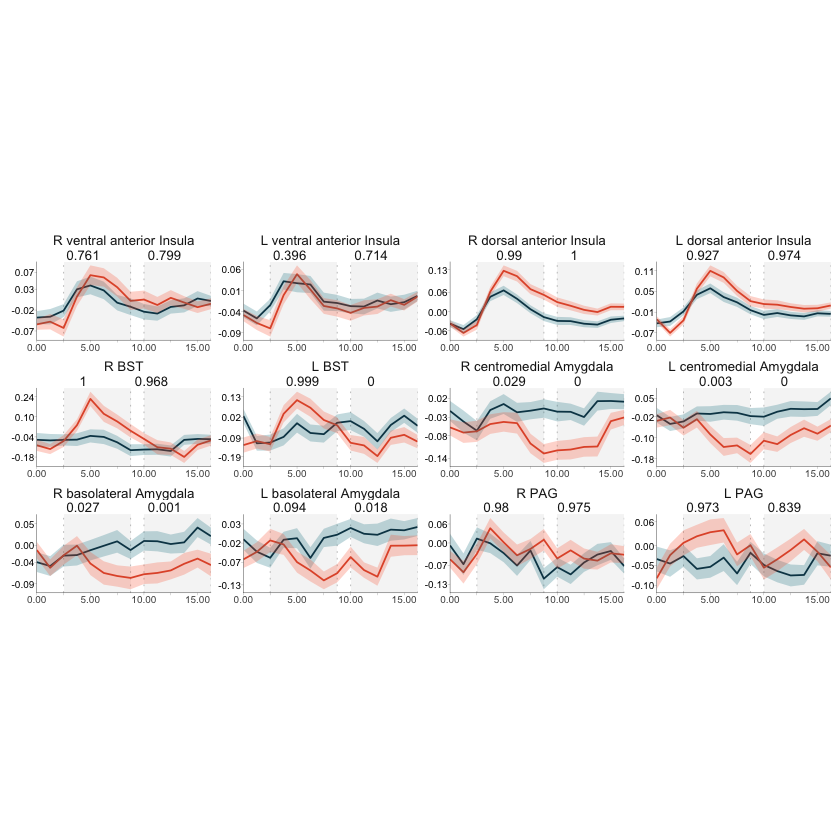

In [23]:
plot.df %>% filter(newROI ==      "R dorsal anterior Insula" |
                  newROI ==       "L dorsal anterior Insula" |
                  newROI ==       "R ventral anterior Insula" |
                  newROI ==       "L ventral anterior Insula" |
                  newROI ==       "R BST" |
                  newROI ==       "L BST" |
                  newROI ==       "R centromedial Amygdala" |
                  newROI ==       "L centromedial Amygdala" |
                  newROI ==       "R basolateral Amygdala" |
                  newROI ==       "L basolateral Amygdala" |
                  newROI ==       "R PAG" |
                  newROI ==       "L PAG") %>%
  ggplot(aes(x = Time, y = mean, color = Cond_type)) +
  coord_cartesian(xlim = c(0,16.25)) +
  facet_wrap(~newROI*p.label,
             scales = "free",
             ncol = 4) + 
  labs(y = NULL, x = NULL, title = NULL)  + 
   # create box for Early Period
  geom_rect(mapping=aes(xmin=2.5, xmax=8.75, ymin=-Inf, ymax=Inf), fill = "#F5F5F5", color = NA, alpha=0.5) +
   geom_vline(xintercept = 2.5, size = .25, linetype = "dotted", color = "gray") +
   geom_vline(xintercept = 8.75, size = .25, linetype = "dotted", color = "gray") +

  # create box for Late Period
  geom_rect(mapping=aes(xmin=10, xmax=16.25, ymin=-Inf, ymax=Inf), fill = "#F5F5F5", color = NA, alpha=0.5)  +
   geom_vline(xintercept = 10, size = .25, linetype = "dotted", color = "gray") +
   geom_vline(xintercept = 16.25, size = .25, linetype = "dotted", color = "gray") +

  # plots lines
 geom_line(size = .5) +


  # change colors from auto colors

  scale_color_manual(values = c("#0D2E41","#D95436")) +
  scale_fill_manual(values = c("#00798A","#FA6135")) +

  # Confidence intervals -- Comment out this line if Luiz does not want them.
  geom_ribbon(aes(ymin=lower.ci, ymax=upper.ci, fill = Cond_type), color = NA, alpha = 0.25)+

   scale_x_continuous(limits = c(0, 17.5),
                      breaks = c(0.00, 2.50, 5.00,  7.50, 10.00,  12.50,  15.00),
                      labels = c("0.00", "", "5.00", "", "10.00", "", "15.00"),
                      expand = c(0,0)) + 
  scale_y_continuous(breaks = equal_breaks(n = 4, s = 0.15)) +
theme(
     strip.background = element_blank(),
    strip.text.x = element_text(size = 8,  margin = margin(0,0,0.01,0, "cm")),
    aspect.ratio = .45,
    plot.title = element_text(hjust = 0.5, size = 2),
    panel.grid.major.x = element_blank(),
    panel.grid.minor.x = element_blank(),
    panel.grid.minor.y = element_blank(),
    panel.grid.major.y = element_blank(),
    panel.spacing.x=unit(0.2, "lines"),
    panel.spacing.y=unit(0.2, "lines"),
    #panel.spacing = unit(c(.5,.5), "lines"),
    panel.background = element_rect(fill = "transparent"),
    axis.ticks.length=unit(.05, "cm"),
    axis.ticks = element_line(size = .05),
    # change x-axis text size
    axis.text.x = element_text(size = 6, margin = margin(t = 0.2, r = 0, b = 0, l = 0)),
    # change y-axis text size
    axis.text.y = element_text(size = 6, color = "black", margin = margin(t = 0.2, r = 0, b = 0, l = 0)),
    legend.position = 'none',
    axis.title = element_text(size = 12),
    axis.line.x = element_line(color = "black", size = .1),
    axis.line.y = element_line(color = "black", size = .1))

ggsave(here("images/threat-related.pdf"), height = 95, width = 140, units = "mm", dpi = 300)

### ROIs showing threat decreases

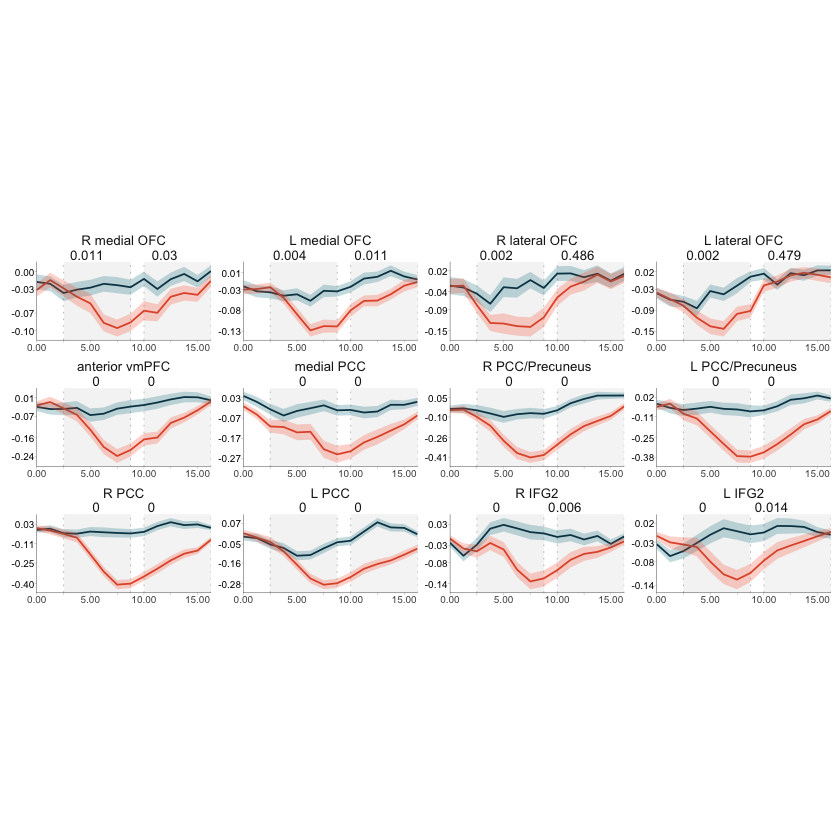

In [24]:
plot.df %>% filter(newROI ==      "anterior vmPFC" |
                  newROI ==       "R PCC/Precuneus" |
                  newROI ==       "L PCC/Precuneus" |
                  newROI ==       "R PCC" |
                  newROI ==       "L PCC" |
                  newROI ==       "medial PCC" |
                  newROI ==       "R lateral OFC" |
                  newROI ==       "L lateral OFC" |
                  newROI ==       "R medial OFC" |
                  newROI ==       "L medial OFC" |
                  newROI ==       "L IFG2" |
                  newROI ==       "R IFG2") %>%
  ggplot(aes(x = Time, y = mean, color = Cond_type)) +
  
  facet_wrap(~newROI*p.label,
             scales = "free",
             ncol = 4) + 
  
  coord_cartesian(xlim = c(0,16.25)) +
  
  labs(y = NULL, x = NULL, title = NULL)  + 
  geom_rect(mapping=aes(xmin=2.5, xmax=8.75, ymin=-Inf, ymax=Inf), fill = "#F5F5F5", color = NA, alpha=0.75) +
   geom_vline(xintercept = 2.5, size = .25, linetype = "dotted", color = "gray") +
   geom_vline(xintercept = 8.75, size = .25, linetype = "dotted", color = "gray") +

  # create box for Late Period
  geom_rect(mapping=aes(xmin=10, xmax=16.25, ymin=-Inf, ymax=Inf), fill = "#F5F5F5", color = NA, alpha=0.5)  +
     geom_vline(xintercept = 10, size = .25, linetype = "dotted", color = "gray") +
   geom_vline(xintercept = 16.25, size = .25, linetype = "dotted", color = "gray") +

  # plots lines
 geom_line(size = .5) +


  # change colors from auto colors

  scale_color_manual(values = c("#0D2E41","#D95436")) +
  scale_fill_manual(values = c("#00798A","#FA6135")) +
  
  # Confidence intervals -- Comment out this line if Luiz does not want them.
  geom_ribbon(aes(ymin=lower.ci, ymax=upper.ci, fill = Cond_type), color = NA, alpha = 0.25)+

   scale_x_continuous(limits = c(0, 17.5),
                      breaks = c(0.00, 2.50, 5.00,  7.50, 10.00,  12.50,  15.00),
                      labels = c("0.00", "", "5.00", "", "10.00", "", "15.00"),
                       expand = c(0,0)) + 
  scale_y_continuous(breaks = equal_breaks(n = 4, s = 0.15)) +
theme(
     strip.background = element_blank(),
    strip.text.x = element_text(size = 8,  margin = margin(0,0,0.01,0, "cm")),
    aspect.ratio = .45,
    plot.title = element_text(hjust = 0.5, size = 2),
    panel.grid.major.x = element_blank(),
    panel.grid.minor.x = element_blank(),
    panel.grid.minor.y = element_blank(),
    panel.grid.major.y = element_blank(),
    panel.spacing.x=unit(0.2, "lines"),
    panel.spacing.y=unit(0.2, "lines"),
    #panel.spacing = unit(c(.5,.5), "lines"),
    panel.background = element_rect(fill = "transparent"),
    axis.ticks.length=unit(.05, "cm"),
    axis.ticks = element_line(size = .05),
    # change x-axis text size
    axis.text.x = element_text(size = 6, margin = margin(t = 0.2, r = 0, b = 0, l = 0)),
    # change y-axis text size
    axis.text.y = element_text(size = 6, color = "black", margin = margin(t = 0.2, r = 0, b = 0, l = 0)),
    legend.position = 'none',
    axis.title = element_text(size = 12),
    axis.line.x = element_line(color = "black", size = .1),
    axis.line.y = element_line(color = "black", size = .1))

ggsave(here("images/threatDecrease_ROIs.pdf"), height = 95, width = 140, units = "mm", dpi = 300)

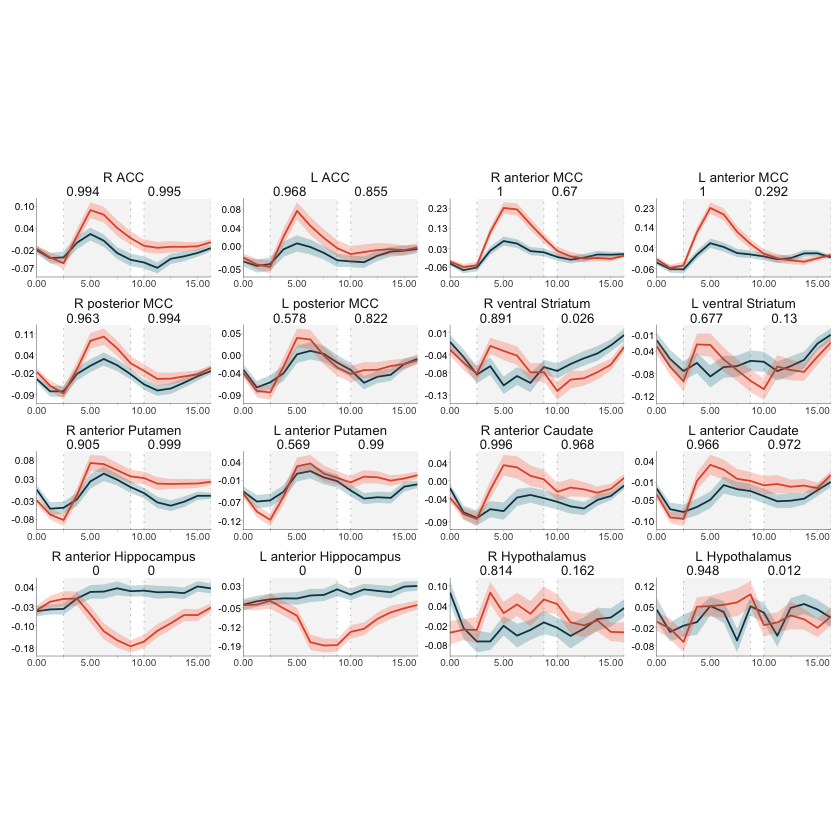

In [25]:
plot.df %>% filter(newROI ==      "R ACC" |
                  newROI ==       "L ACC" |
                  newROI ==       "R anterior MCC" |
                  newROI ==       "L anterior MCC" |
                  newROI ==       "R posterior MCC" |
                  newROI ==       "L posterior MCC" |
                  newROI ==       "R anterior Caudate" |
                  newROI ==       "L anterior Caudate" |
                  newROI ==       "R anterior Putamen" |
                  newROI ==       "L anterior Putamen" |
                  newROI ==       "R ventral Striatum" |
                  newROI ==       "L ventral Striatum" |
                  newROI ==       "R Hypothalamus" |
                  newROI ==       "L Hypothalamus" |
                  newROI ==       "R anterior Hippocampus" |
                  newROI ==       "L anterior Hippocampus") %>%
  ggplot(aes(x = Time, y = mean, color = Cond_type)) +
  
  facet_wrap(~newROI*p.label,
             scales = "free",
             ncol = 4) + 
  
  coord_cartesian(xlim = c(0,16.25)) +
  
  labs(y = NULL, x = NULL, title = NULL)  + 
  geom_rect(mapping=aes(xmin=2.5, xmax=8.75, ymin=-Inf, ymax=Inf), fill = "#F5F5F5", color = NA, alpha=0.5) +
   geom_vline(xintercept = 2.5, size = .25, linetype = "dotted", color = "gray") +
   geom_vline(xintercept = 8.75, size = .25, linetype = "dotted", color = "gray") +

  # create box for Late Period
  geom_rect(mapping=aes(xmin=10, xmax=16.25, ymin=-Inf, ymax=Inf), fill = "#F5F5F5", color = NA, alpha=0.5)  +
     geom_vline(xintercept = 10, size = .25, linetype = "dotted", color = "gray") +
   geom_vline(xintercept = 16.25, size = .25, linetype = "dotted", color = "gray") +

  # plots lines
 geom_line(size = .5) +


  # change colors from auto colors

  scale_color_manual(values = c("#0D2E41","#D95436")) +
  scale_fill_manual(values = c("#00798A","#FA6135")) +
  
  # Confidence intervals -- Comment out this line if Luiz does not want them.
  geom_ribbon(aes(ymin=lower.ci, ymax=upper.ci, fill = Cond_type), color = NA, alpha = 0.25)+

   scale_x_continuous(limits = c(0, 17.5),
                      breaks = c(0.00, 2.50, 5.00,  7.50, 10.00,  12.50,  15.00),
                      labels = c("0.00", "", "5.00", "", "10.00", "", "15.00"),
                       expand = c(0,0)) + 
  scale_y_continuous(breaks = equal_breaks(n = 4, s = 0.15)) +
theme(
     strip.background = element_blank(),
    strip.text.x = element_text(size = 8,  margin = margin(0,0,0.01,0, "cm")),
    aspect.ratio = .45,
    plot.title = element_text(hjust = 0.5, size = 2),
    panel.grid.major.x = element_blank(),
    panel.grid.minor.x = element_blank(),
    panel.grid.minor.y = element_blank(),
    panel.grid.major.y = element_blank(),
    panel.spacing.x=unit(0.2, "lines"),
    panel.spacing.y=unit(0.2, "lines"),
    #panel.spacing = unit(c(.5,.5), "lines"),
    panel.background = element_rect(fill = "transparent"),
    axis.ticks.length=unit(.05, "cm"),
    axis.ticks = element_line(size = .05),
    # change x-axis text size
    axis.text.x = element_text(size = 6, margin = margin(t = 0.2, r = 0, b = 0, l = 0)),
    # change y-axis text size
    axis.text.y = element_text(size = 6, color = "black", margin = margin(t = 0.2, r = 0, b = 0, l = 0)),
    legend.position = 'none',
    axis.title = element_text(size = 12),
    axis.line.x = element_line(color = "black", size = .1),
    axis.line.y = element_line(color = "black", size = .1))

ggsave(here("images/additional_ROIs.pdf"), height = 95, width = 140, units = "mm", dpi = 300)

### Caudate & putamen

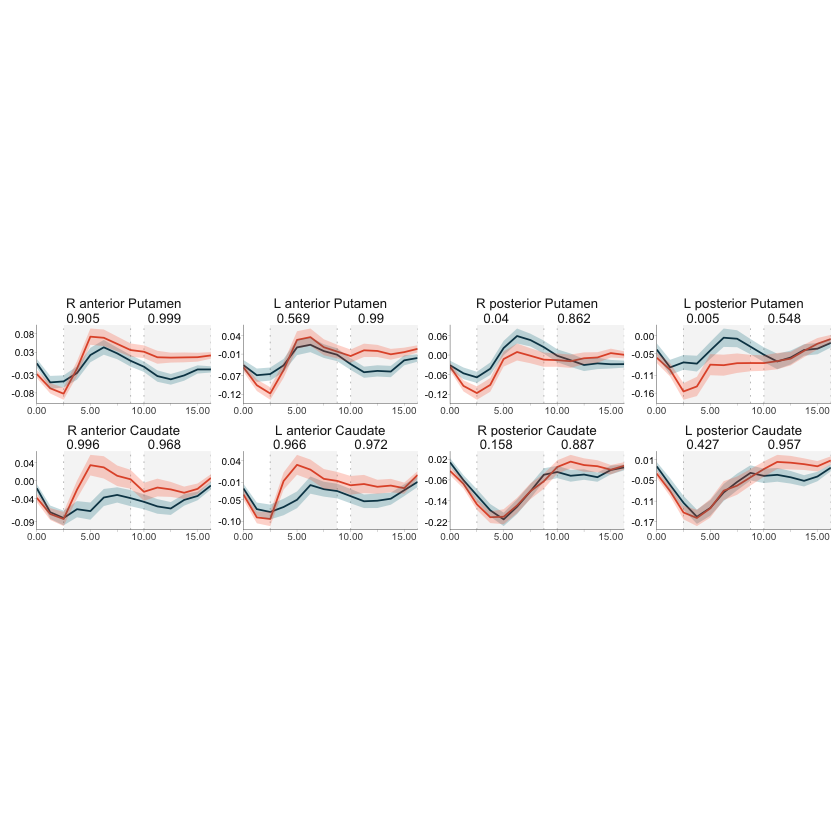

In [26]:
plot.df %>% filter(newROI == "R anterior Putamen" |
                   newROI == "L anterior Putamen" |
                   newROI == "R posterior Putamen" |      
                   newROI == "L posterior Putamen" |
                   newROI == "R anterior Caudate" |
                   newROI == "L anterior Caudate" |
                   newROI ==  "R posterior Caudate" |
                   newROI == "L posterior Caudate") %>%
  ggplot(aes(x = Time, y = mean, color = Cond_type)) +
  coord_cartesian(xlim = c(0,16.25)) +
  facet_wrap(~newROI*p.label,
             scales = "free",
             ncol = 4) + 
  labs(y = NULL, x = NULL, title = NULL)  + 
   # create box for Early Period
  geom_rect(mapping=aes(xmin=2.5, xmax=8.75, ymin=-Inf, ymax=Inf), fill = "#F5F5F5", color = NA, alpha=0.5) +
   geom_vline(xintercept = 2.5, size = .25, linetype = "dotted", color = "gray") +
   geom_vline(xintercept = 8.75, size = .25, linetype = "dotted", color = "gray") +

  # create box for Late Period
  geom_rect(mapping=aes(xmin=10, xmax=16.25, ymin=-Inf, ymax=Inf), fill = "#F5F5F5", color = NA, alpha=0.5)  +
   geom_vline(xintercept = 10, size = .25, linetype = "dotted", color = "gray") +
   geom_vline(xintercept = 16.25, size = .25, linetype = "dotted", color = "gray") +

  # plots lines
 geom_line(size = .5) +


  # change colors from auto colors

  scale_color_manual(values = c("#0D2E41","#D95436")) +
  scale_fill_manual(values = c("#00798A","#FA6135")) +

  # Confidence intervals -- Comment out this line if Luiz does not want them.
  geom_ribbon(aes(ymin=lower.ci, ymax=upper.ci, fill = Cond_type), color = NA, alpha = 0.25)+

   scale_x_continuous(limits = c(0, 17.5),
                      breaks = c(0.00, 2.50, 5.00,  7.50, 10.00,  12.50,  15.00),
                      labels = c("0.00", "", "5.00", "", "10.00", "", "15.00"),
                      expand = c(0,0)) + 
  scale_y_continuous(breaks = equal_breaks(n = 4, s = 0.15)) +
theme(
     strip.background = element_blank(),
    strip.text.x = element_text(size = 8,  margin = margin(0,0,0.01,0, "cm")),
    aspect.ratio = .45,
    plot.title = element_text(hjust = 0.5, size = 2),
    panel.grid.major.x = element_blank(),
    panel.grid.minor.x = element_blank(),
    panel.grid.minor.y = element_blank(),
    panel.grid.major.y = element_blank(),
    panel.spacing.x=unit(0.2, "lines"),
    panel.spacing.y=unit(0.2, "lines"),
    #panel.spacing = unit(c(.5,.5), "lines"),
    panel.background = element_rect(fill = "transparent"),
    axis.ticks.length=unit(.05, "cm"),
    axis.ticks = element_line(size = .05),
    # change x-axis text size
    axis.text.x = element_text(size = 6, margin = margin(t = 0.2, r = 0, b = 0, l = 0)),
    # change y-axis text size
    axis.text.y = element_text(size = 6, color = "black", margin = margin(t = 0.2, r = 0, b = 0, l = 0)),
    legend.position = 'none',
    axis.title = element_text(size = 12),
    axis.line.x = element_line(color = "black", size = .1),
    axis.line.y = element_line(color = "black", size = .1))

ggsave(here("images/caudate-putamen.pdf"), height = 95, width = 140, units = "mm", dpi = 300)

### Thalamus

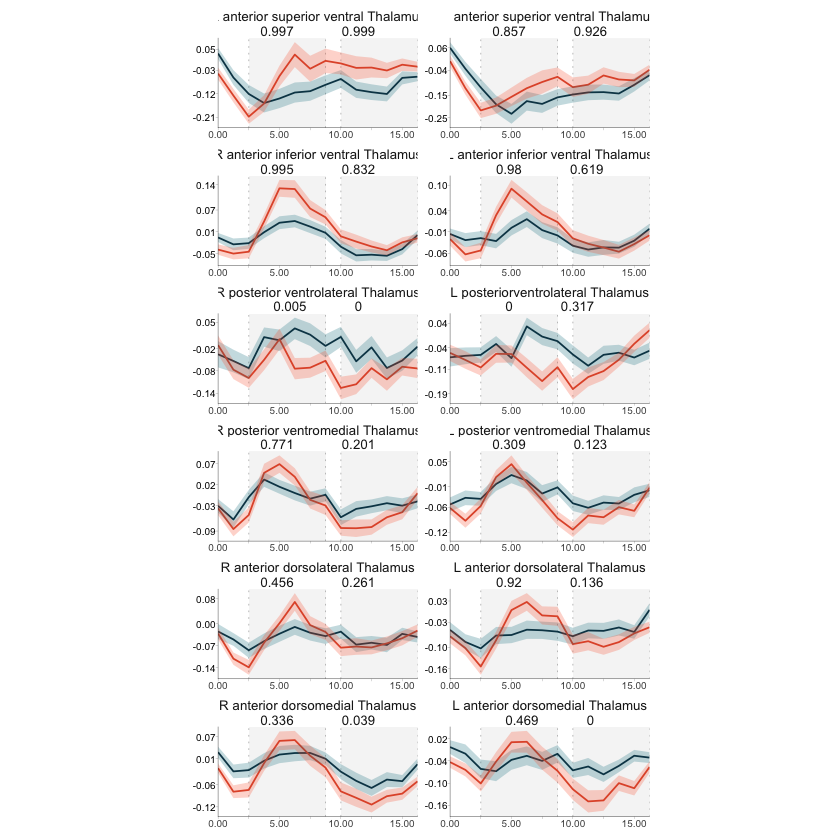

In [27]:
plot.df %>% filter(newROI == "R anterior superior ventral Thalamus" |
                   newROI == "L anterior superior ventral Thalamus" |
                   newROI == "R anterior inferior ventral Thalamus" | 
                   newROI == "L anterior inferior ventral Thalamus" |
                   newROI == "R posterior ventrolateral Thalamus" |
                   newROI == "L posteriorventrolateral Thalamus" |
                   newROI == "R posterior ventromedial Thalamus" |
                   newROI == "L posterior ventromedial Thalamus" |
                   newROI == "R anterior dorsolateral Thalamus" |
                   newROI == "L anterior dorsolateral Thalamus" |
                   newROI == "R anterior dorsomedial Thalamus" |
                   newROI == "L anterior dorsomedial Thalamus" ) %>%
  ggplot(aes(x = Time, y = mean, color = Cond_type)) +
  
  facet_wrap(~newROI*p.label,
             scales = "free",
             ncol = 2) + 
  
  coord_cartesian(xlim = c(0,16.25)) +
  
  labs(y = NULL, x = NULL, title = NULL)  + 
  geom_rect(mapping=aes(xmin=2.5, xmax=8.75, ymin=-Inf, ymax=Inf), fill = "#F5F5F5", color = NA, alpha=0.5) +
   geom_vline(xintercept = 2.5, size = .25, linetype = "dotted", color = "gray") +
   geom_vline(xintercept = 8.75, size = .25, linetype = "dotted", color = "gray") +

  # create box for Late Period
  geom_rect(mapping=aes(xmin=10, xmax=16.25, ymin=-Inf, ymax=Inf), fill = "#F5F5F5", color = NA, alpha=0.5)  +
     geom_vline(xintercept = 10, size = .25, linetype = "dotted", color = "gray") +
   geom_vline(xintercept = 16.25, size = .25, linetype = "dotted", color = "gray") +

  # plots lines
 geom_line(size = .5) +


  # change colors from auto colors

  scale_color_manual(values = c("#0D2E41","#D95436")) +
  scale_fill_manual(values = c("#00798A","#FA6135")) +
  
  # Confidence intervals -- Comment out this line if Luiz does not want them.
  geom_ribbon(aes(ymin=lower.ci, ymax=upper.ci, fill = Cond_type), color = NA, alpha = 0.25)+

   scale_x_continuous(limits = c(0, 17.5),
                      breaks = c(0.00, 2.50, 5.00,  7.50, 10.00,  12.50,  15.00),
                      labels = c("0.00", "", "5.00", "", "10.00", "", "15.00"),
                       expand = c(0,0)) + 
  scale_y_continuous(breaks = equal_breaks(n = 4, s = 0.15)) +
theme(
     strip.background = element_blank(),
    strip.text.x = element_text(size = 8,  margin = margin(0,0,0.01,0, "cm")),
    aspect.ratio = .45,
    plot.title = element_text(hjust = 0.5, size = 2),
    panel.grid.major.x = element_blank(),
    panel.grid.minor.x = element_blank(),
    panel.grid.minor.y = element_blank(),
    panel.grid.major.y = element_blank(),
    panel.spacing.x=unit(0.2, "lines"),
    panel.spacing.y=unit(0.2, "lines"),
    #panel.spacing = unit(c(.5,.5), "lines"),
    panel.background = element_rect(fill = "transparent"),
    axis.ticks.length=unit(.05, "cm"),
    axis.ticks = element_line(size = .05),
    # change x-axis text size
    axis.text.x = element_text(size = 6, margin = margin(t = 0.2, r = 0, b = 0, l = 0)),
    # change y-axis text size
    axis.text.y = element_text(size = 6, color = "black", margin = margin(t = 0.2, r = 0, b = 0, l = 0)),
    legend.position = 'none',
    axis.title = element_text(size = 12),
    axis.line.x = element_line(color = "black", size = .1),
    axis.line.y = element_line(color = "black", size = .1))

ggsave(here("images/thalamus_ROIs.pdf"), height = 120, width = 70, units = "mm", dpi = 300)